# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# Installing the libraries with the specified version.
# Not needed as the packages are already installed
##!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Write your code here to read the data
fho_pd = pd.read_csv('foodhub_order.csv')

In [3]:
# Copy the data into another dataframe
# copying data to another variable to avoid any changes to original data
df = fho_pd.copy()

In [9]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [10]:
df.shape

(1898, 9)

#### Observations:
Total there are 1898 rows and 9 columns inside the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- *There are no null value present in the dataset provided*
- *Restaurant_name, cuisine_type, day_of_the_week & rating columns are of object data types*
- *Rest are either int64 or float64 data types*

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [15]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
I dont see any null value in the data set. But, rating column have values which are not given. Hence, that needs to be fixed.

In [162]:
## Rating column have ratings which is Not Given.
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [164]:
## Lets do some adjustment to these not given data set and apply nan to these values
df['rating'] = df['rating'].replace(['Not given'], np.nan)
df['rating'] = df['rating'].astype(float)
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [168]:
## Lets apply a mean transposition to these nan values
df['rating'] = df['rating'].fillna(value = df['rating'].mean())
df['rating'] = df['rating'].astype(int)
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [169]:
df['rating'].unique()

array([4, 5, 3])

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [170]:
df.describe(include='all').T
# setting include='all' will get the statistical summary for both the numerical and categorical variables.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898.0,NaN,NaN,NaN,4.210748,0.603845,3.0,4.0,4.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
Food Preperation time are as followes :
- *Min = 20 min *
- *Average = 2.737197e+01 min
- *Max = 35 mins *

### **Question 5:** How many orders are not rated? [1 mark]

In [171]:
# Write the code here
fho_pd.groupby(by=['rating'])['order_id'].count()

rating
3            188
4            386
5            588
Not given    736
Name: order_id, dtype: int64

#### Observations:
From the above code, it is evident that around 736 orders are not rated and it is called 'Not given'.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Observations:  Cost of Order
- *Most of the Cost of order are around 12-13 dollor*
- *The distribution is mostly uniform without much skeweness of data*

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


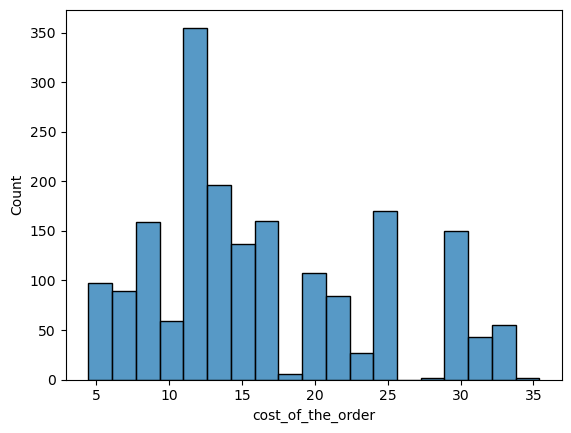

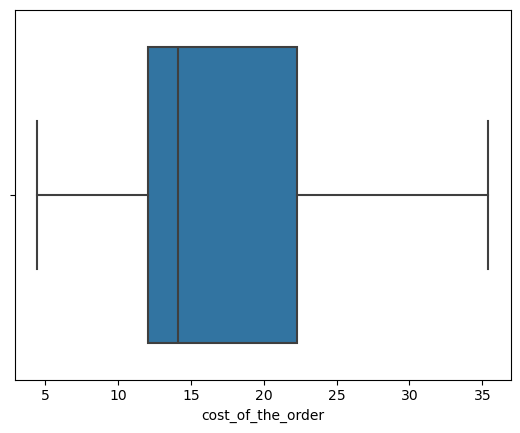

In [26]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show();
sns.boxplot(data=df,x='cost_of_the_order')
plt.show();

#### Observations:  day_of_the_week
- *From Histogram analysis orders are usually more during the weekend than the weekdays*

<Axes: xlabel='day_of_the_week', ylabel='count'>

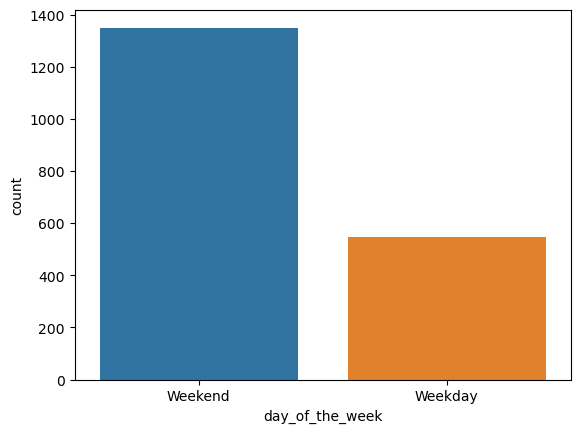

In [34]:
# sns.histplot(data=df,x='day_of_the_week')
# plt.show();
sns.countplot(data=df,x='day_of_the_week')

#### Observations:  rating
- *Heighest no.of customer did not gave rating for the food*
- *5 star ratings are higher, seem the restaurants are providing quality/taste foods*

<Axes: xlabel='rating', ylabel='count'>

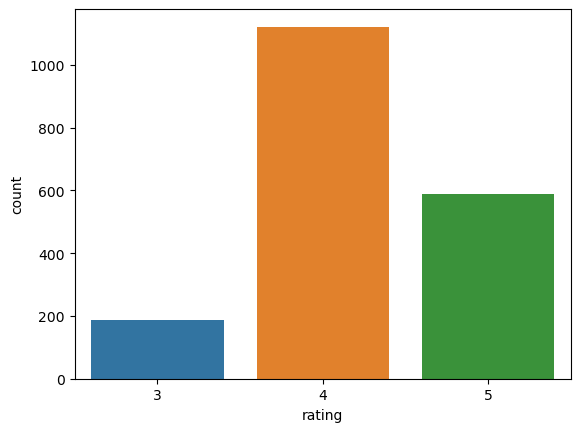

In [174]:

sns.countplot(data=df,x='rating')


#### Observations:  food_preparation_time
- *Max no.of foods got 4 star ratings*

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


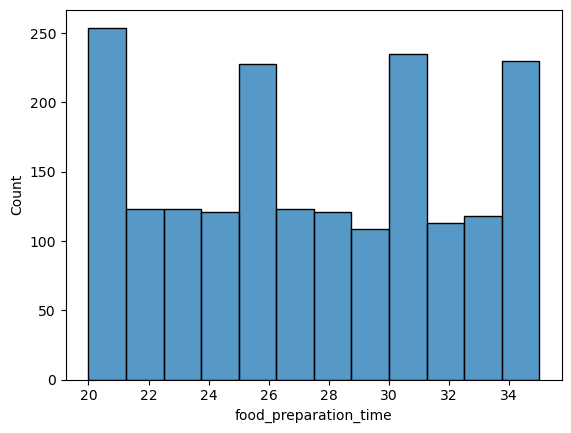

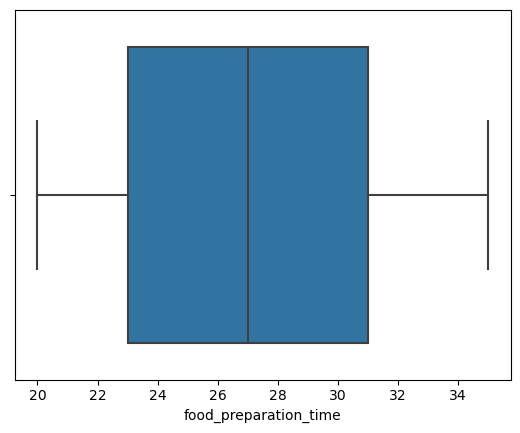

In [32]:
sns.histplot(data=df,x='food_preparation_time')
plt.show();
sns.boxplot(data=df,x='food_preparation_time')
plt.show();

#### Observations:  delivery_time
- *Max delivery time around 32.5 mins*
- *Min delivery time around 15 mins*
- *Height no of order have delivery time between 27.5 to 30 min*

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


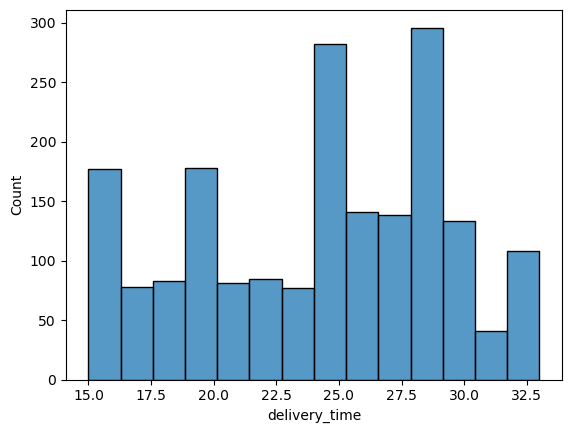

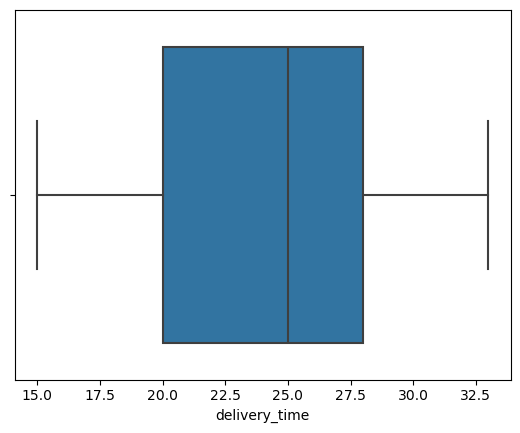

In [37]:
sns.histplot(data=df,x='delivery_time')
plt.show();
sns.boxplot(data=df,x='delivery_time')
plt.show();

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [63]:
# Write the code here
df_restaurent = df.groupby(by=['restaurant_name'])['order_id'].count()
# Finding the largest by column "Order Cound"
df_restaurent.nlargest()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:
- *Restaurant_name            Order Received*
- *Shake Shack                  219*
- *The Meatball Shop            132*
- *Blue Ribbon Sushi            119*
- *Blue Ribbon Fried Chicken     96*
- *Parm                          68*

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [83]:
df_cuisine = df.groupby(by=['cuisine_type','day_of_the_week'])['order_id'].count()
df_cuisine = df_cuisine.to_frame().query('day_of_the_week == "Weekend"').reset_index()
# df_week = df_cuisine.query('day_of_the_week == "Weekend"')
df_cuisine.sort_values(by=["order_id"], ascending=False)

,cuisine_type,day_of_the_week,order_id
0,American,Weekend,415
5,Japanese,Weekend,335
4,Italian,Weekend,207
1,Chinese,Weekend,163
8,Mexican,Weekend,53
3,Indian,Weekend,49
7,Mediterranean,Weekend,32
9,Middle Eastern,Weekend,32
12,Thai,Weekend,15
2,French,Weekend,13


#### Observations:
From the above code, it is evident that the most popular cuisine is 'American' than 'Japanese' followed by 'Italian', 'Chinese', ' Mexican', 'Indian' 

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [95]:
filtered_df = df.query('cost_of_the_order > 20')
total_order = df['cost_of_the_order'].sum()
print(total_order)
total_filtered_order = filtered_df['cost_of_the_order'].sum()
print(total_filtered_order)
percentage = (total_filtered_order / total_order) * 100
print(percentage)

31314.82
14754.91
47.11797800530228


#### Observations:
Percentage of the orders cost more than 20 dollars is 47.12 %

### **Question 10**: What is the mean order delivery time? [1 mark]

In [96]:
df["delivery_time"].mean()

24.161749209694417

#### Observations:
Its very clear that the mean order delivery time is 24.16 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [106]:
df_cust = df.groupby(by=['customer_id'])['order_id'].count()
df_cust.nlargest()

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
Name: order_id, dtype: int64

In [121]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


#### Observations:
Below are the list of customer who needs to get the 20% voucher with customer ids 52832, 47440 & 83287 respectively

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


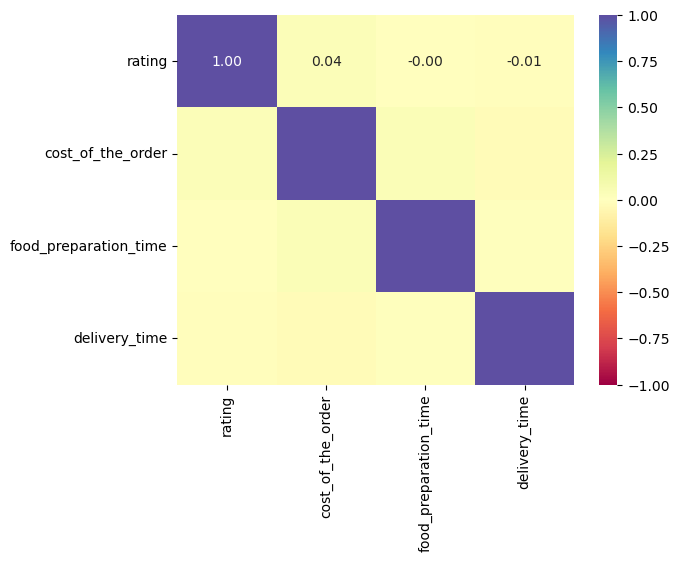

In [178]:
# Check for correlation among numerical variables
num_var = ['rating','cost_of_the_order','food_preparation_time','delivery_time']

corr = df[num_var].corr()

# plot the heatmap

sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

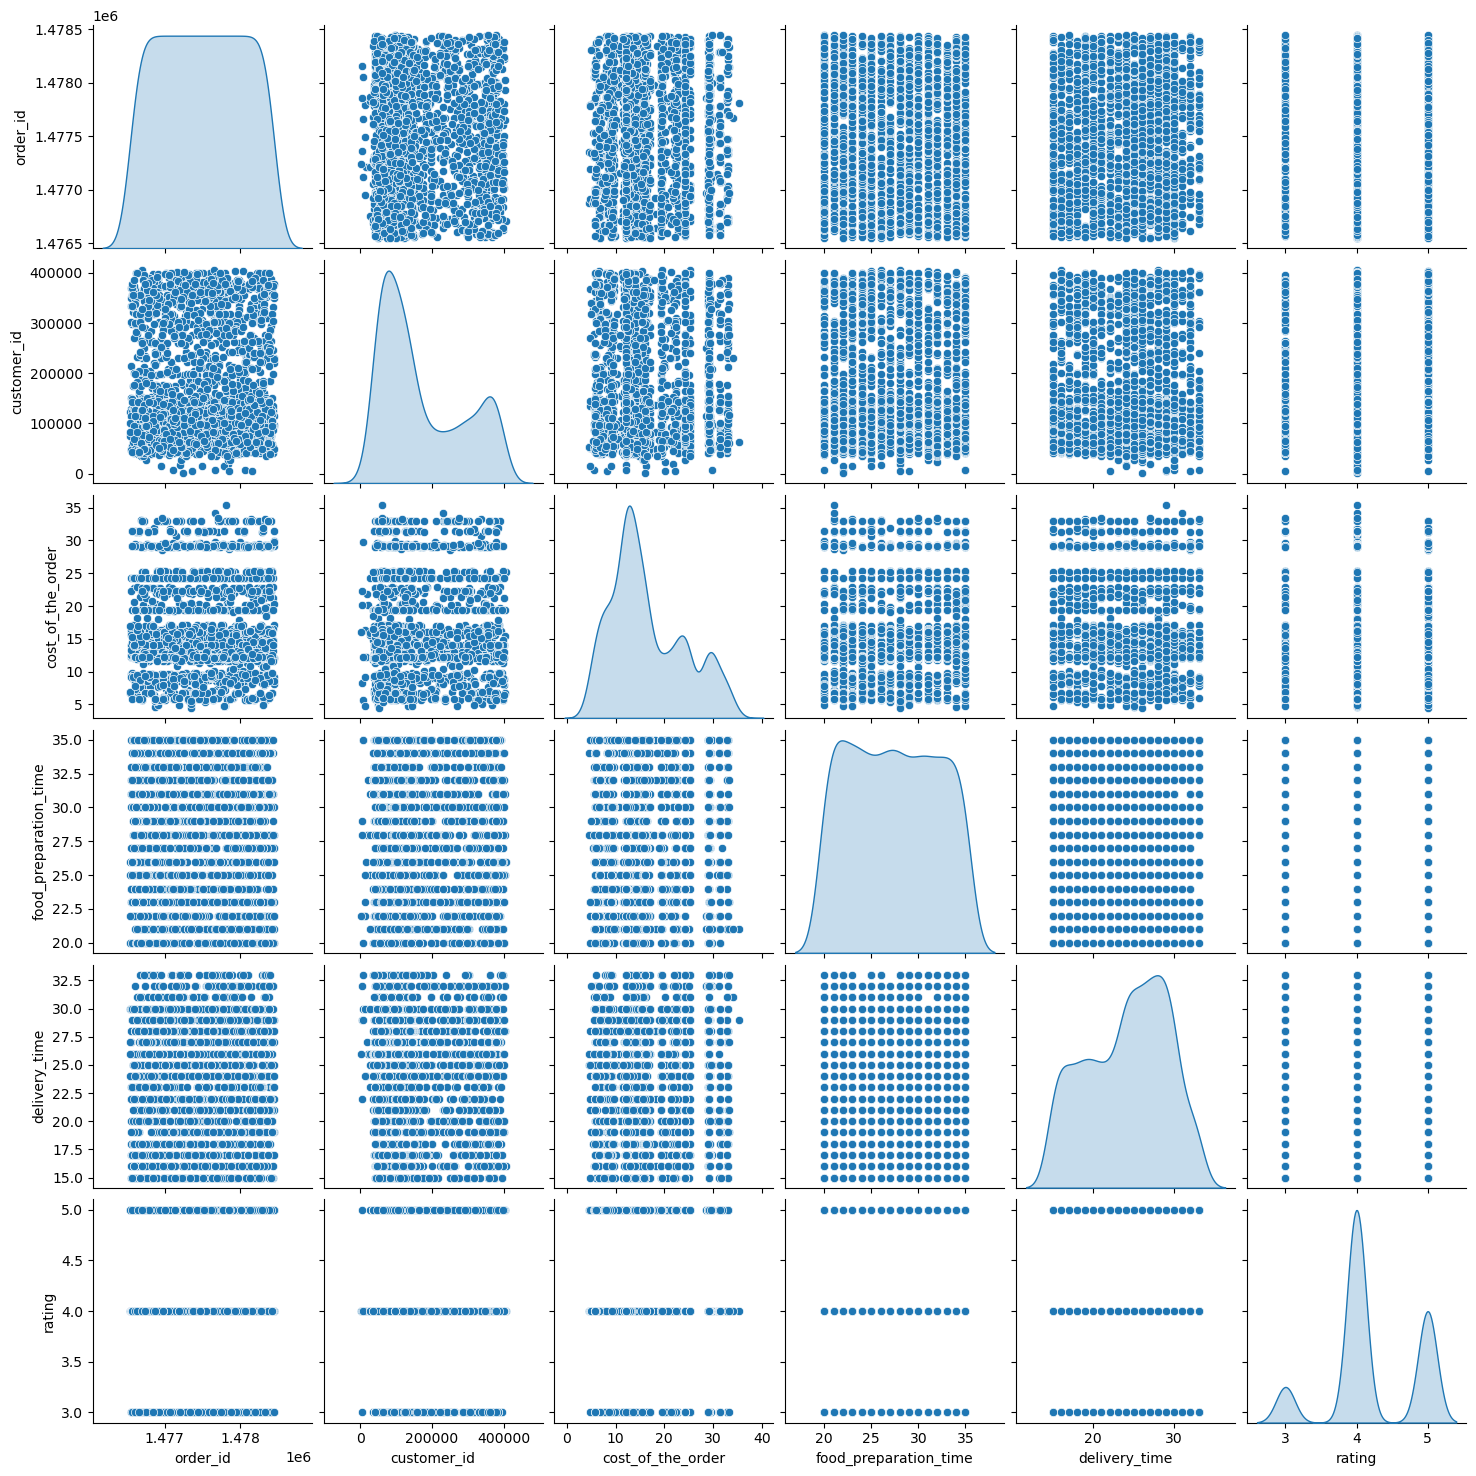

In [179]:
num_var = ['order_id','customer_id','cost_of_the_order','food_preparation_time','delivery_time','rating']
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

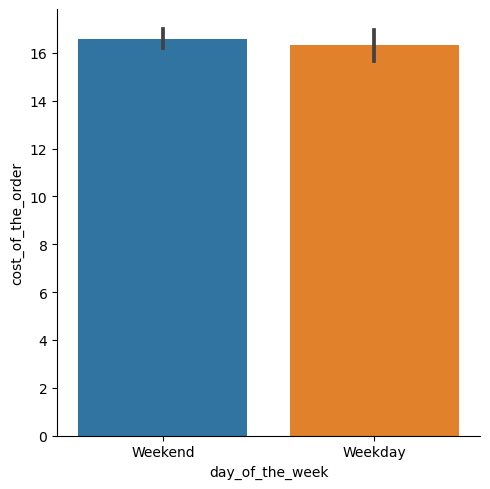

In [137]:
## Relationship between day_of_the_week & cost_of_the_order
sns.catplot(x='day_of_the_week', y='cost_of_the_order', data=df, kind="bar")
# Increase the size of the figure
plt.show()

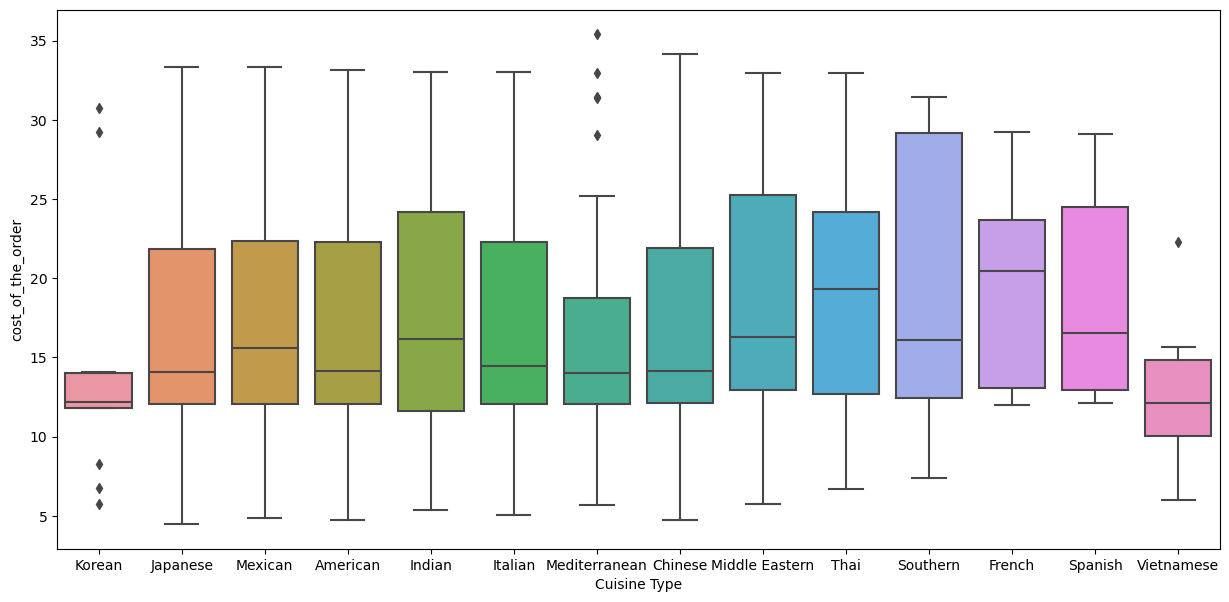

In [145]:
## Relationship between cuisine_type & cost_of_the_order 
plt.figure(figsize=(15,7))
sns.boxplot(x=df['cuisine_type'], y=df['cost_of_the_order'])
plt.ylabel('cost_of_the_order')
plt.xlabel('Cuisine Type')
plt.show()

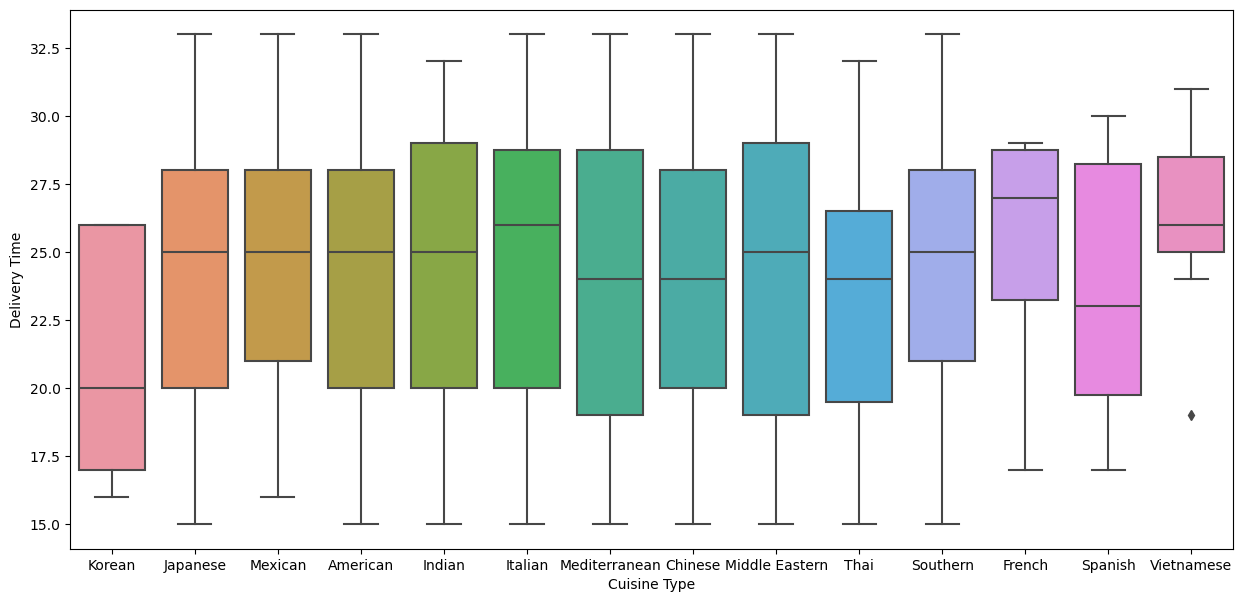

In [144]:
## Relationship between cuisine_type & delivery_time 
plt.figure(figsize=(15,7))
sns.boxplot(x=df['cuisine_type'], y=df['delivery_time'])
plt.ylabel('Delivery Time')
plt.xlabel('Cuisine Type')
plt.show()

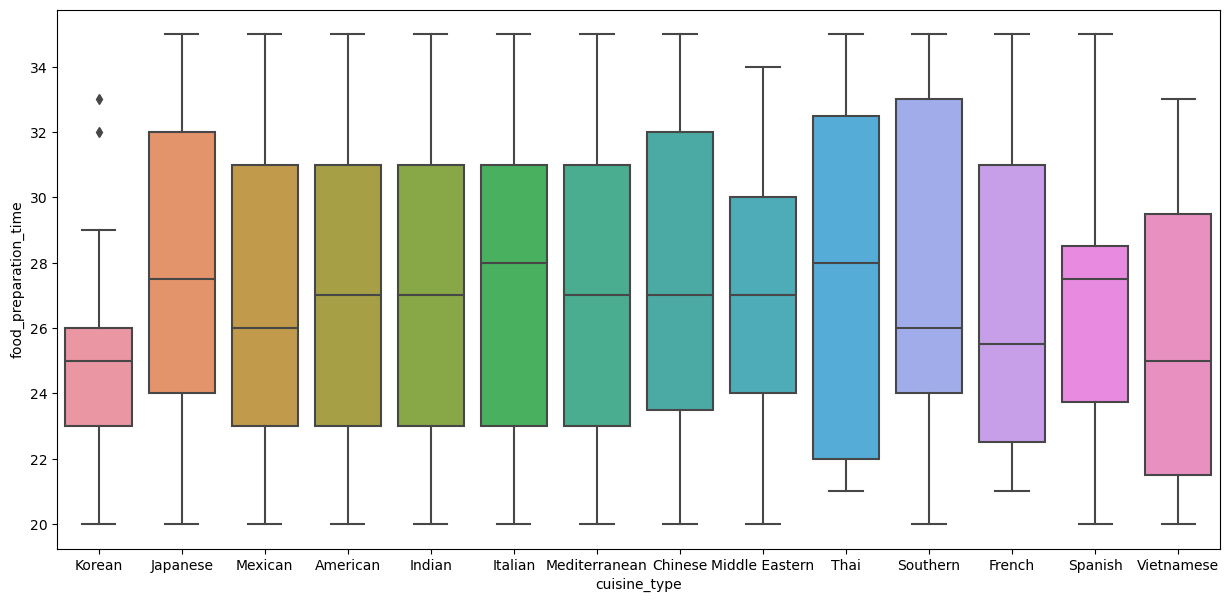

In [143]:
## Relationship between cuisine_type & food_preparation_time 
plt.figure(figsize=(15,7))
sns.boxplot(x=df['cuisine_type'], y=df['food_preparation_time'])
plt.ylabel('food_preparation_time')
plt.xlabel('cuisine_type')
plt.show()

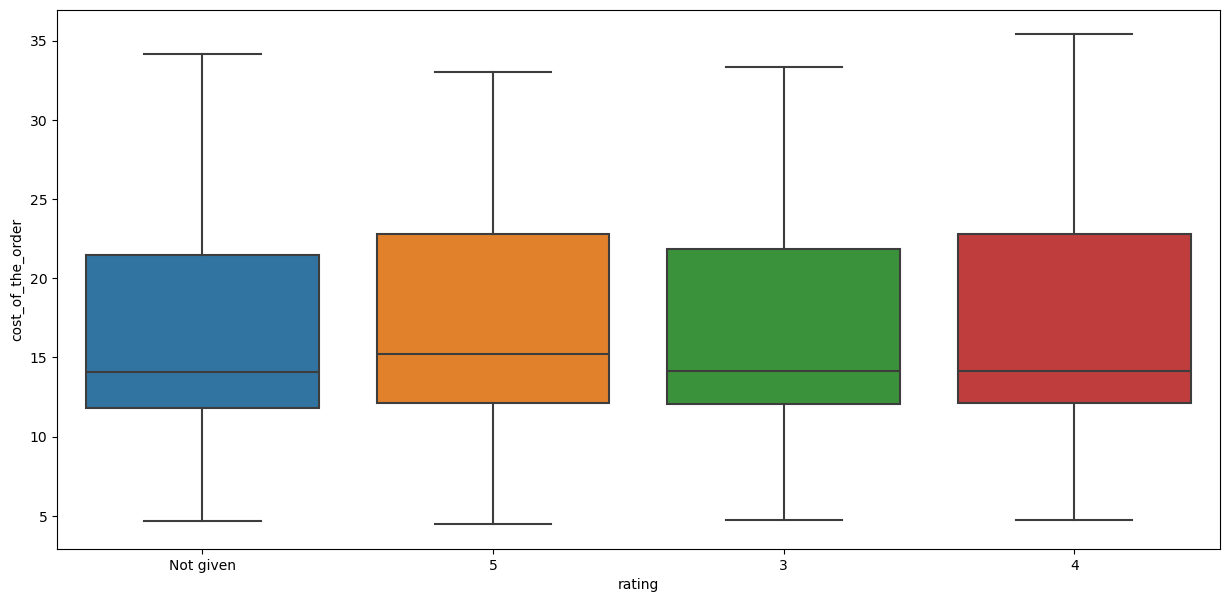

In [146]:
## Relationship between cuisine_type & food_preparation_time 
plt.figure(figsize=(15,7))
sns.boxplot(x=df['rating'], y=df['cost_of_the_order'])
plt.ylabel('cost_of_the_order')
plt.xlabel('rating')
plt.show()

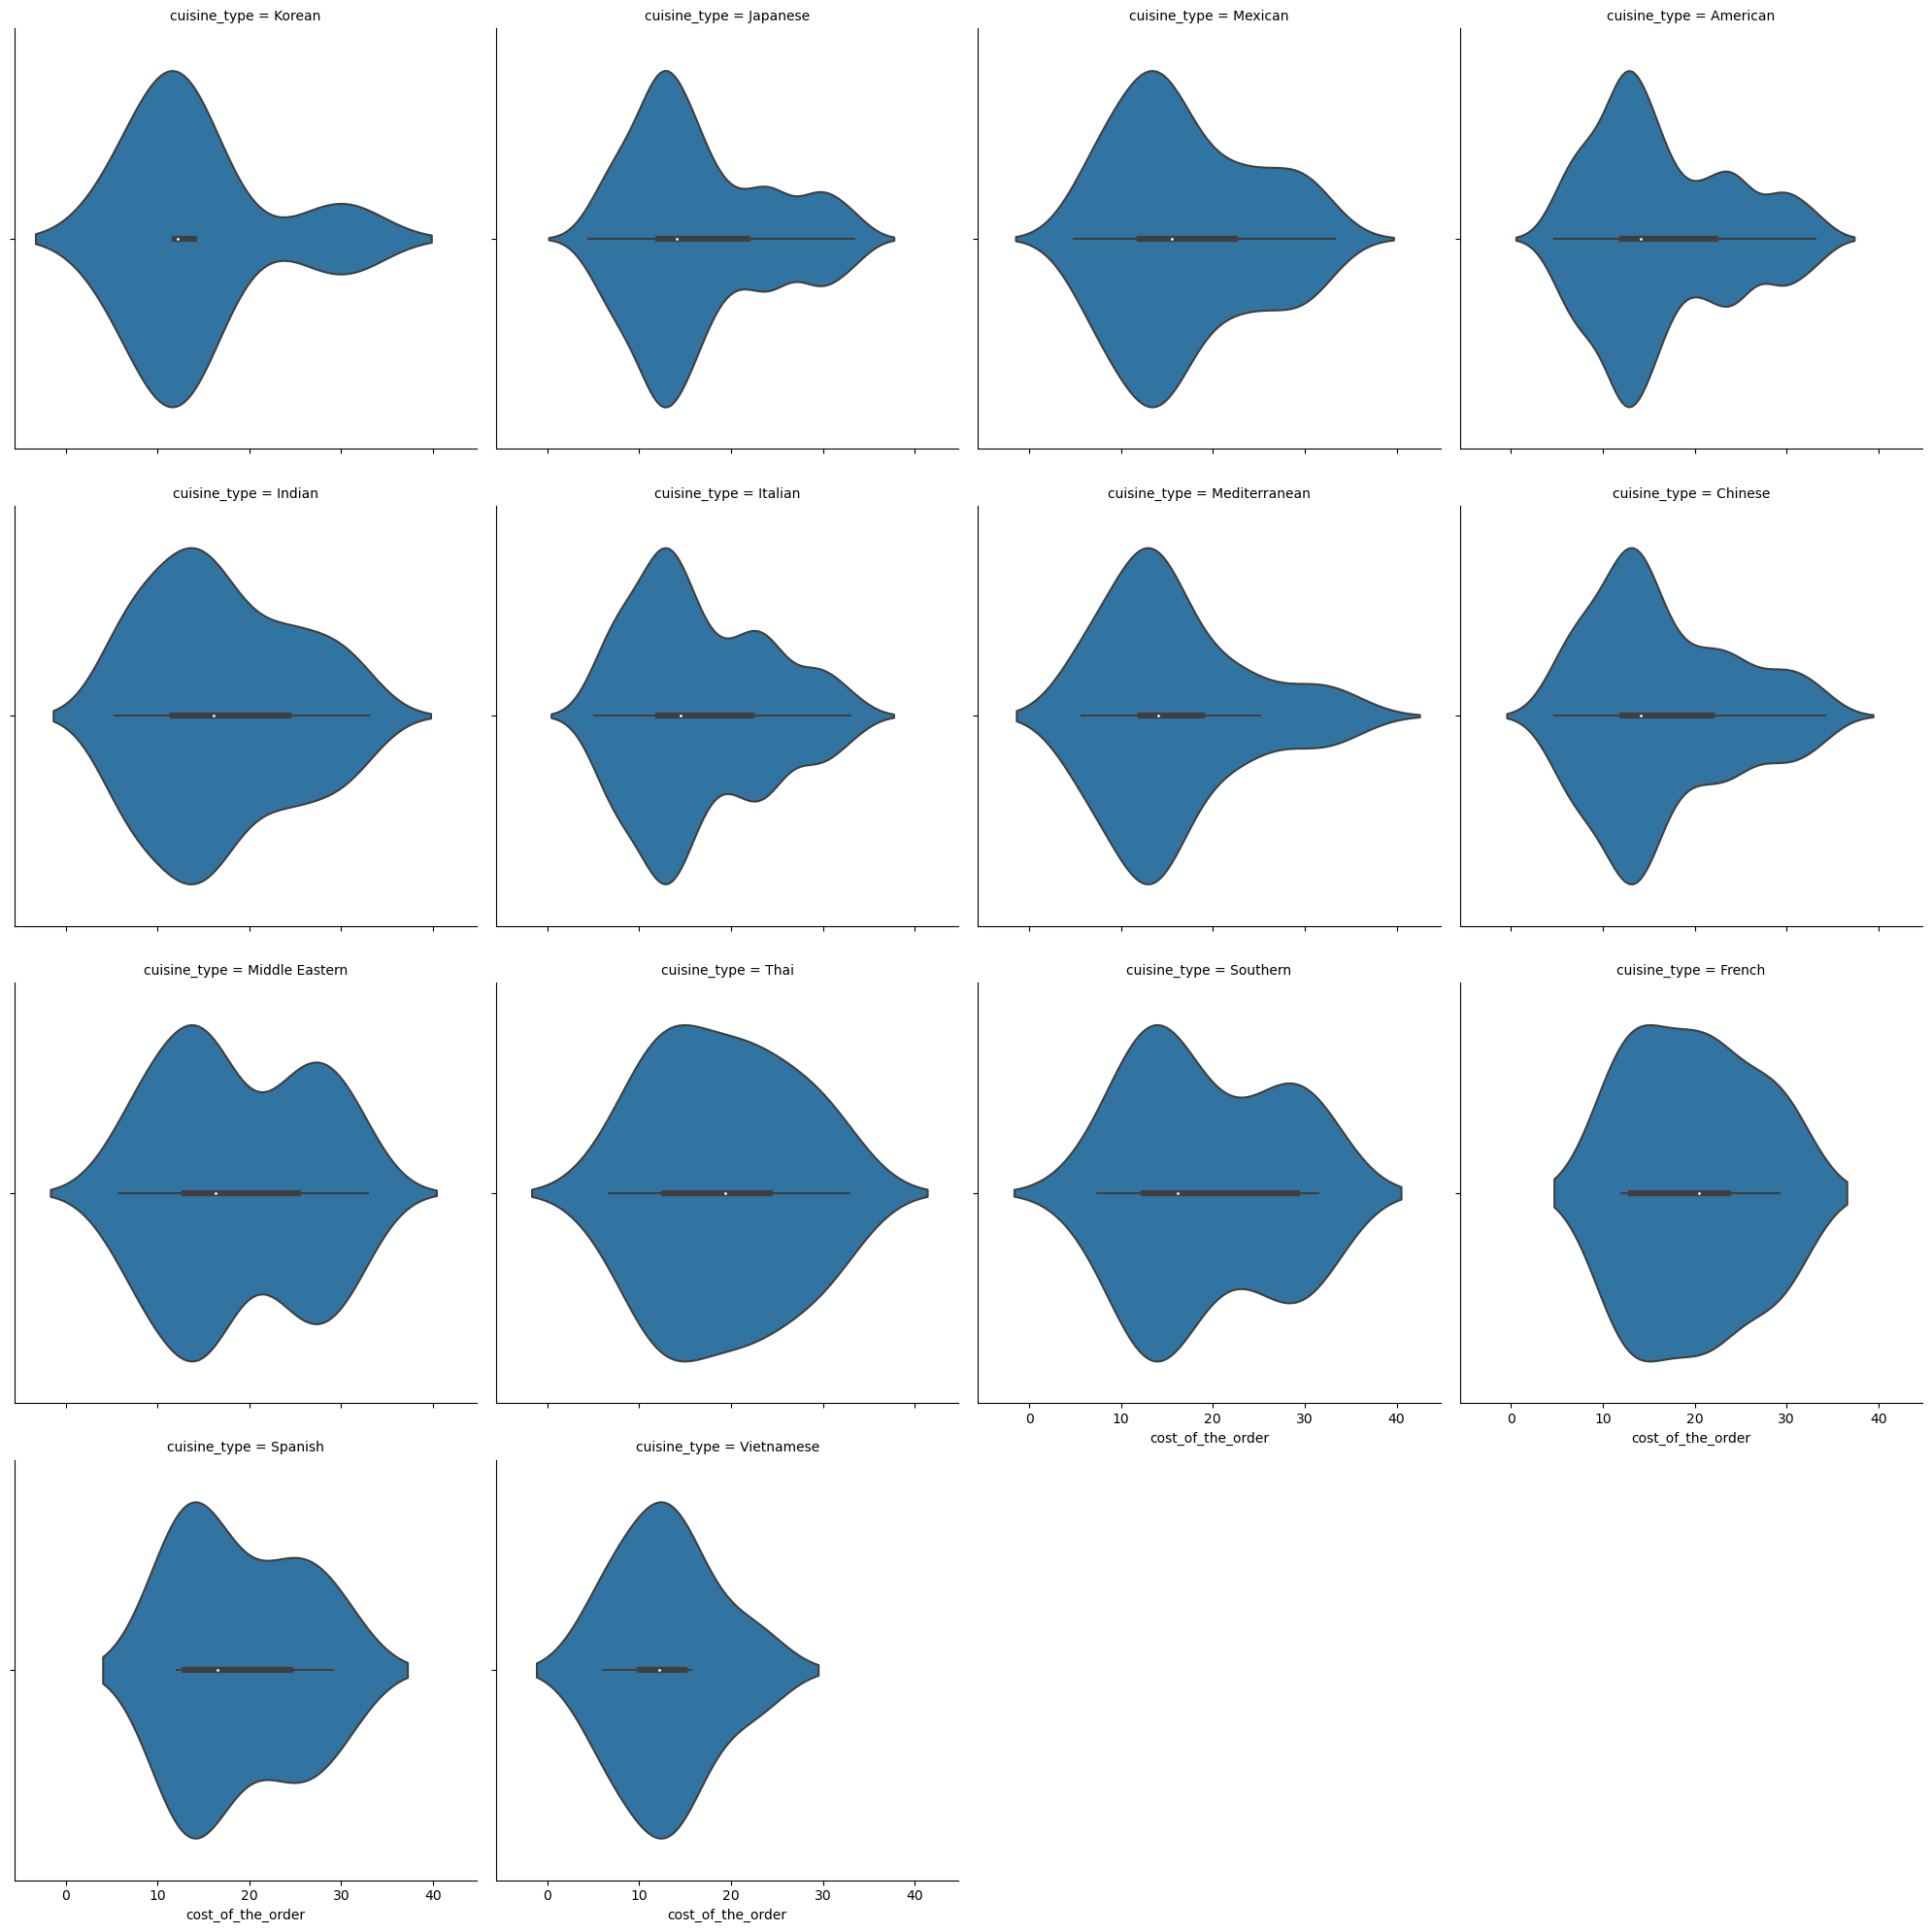

In [160]:
# Correlation between Cost of order and cuisine type

sns.catplot(x='cost_of_the_order', col='cuisine_type', data=df, col_wrap=4, kind="violin")
plt.show()

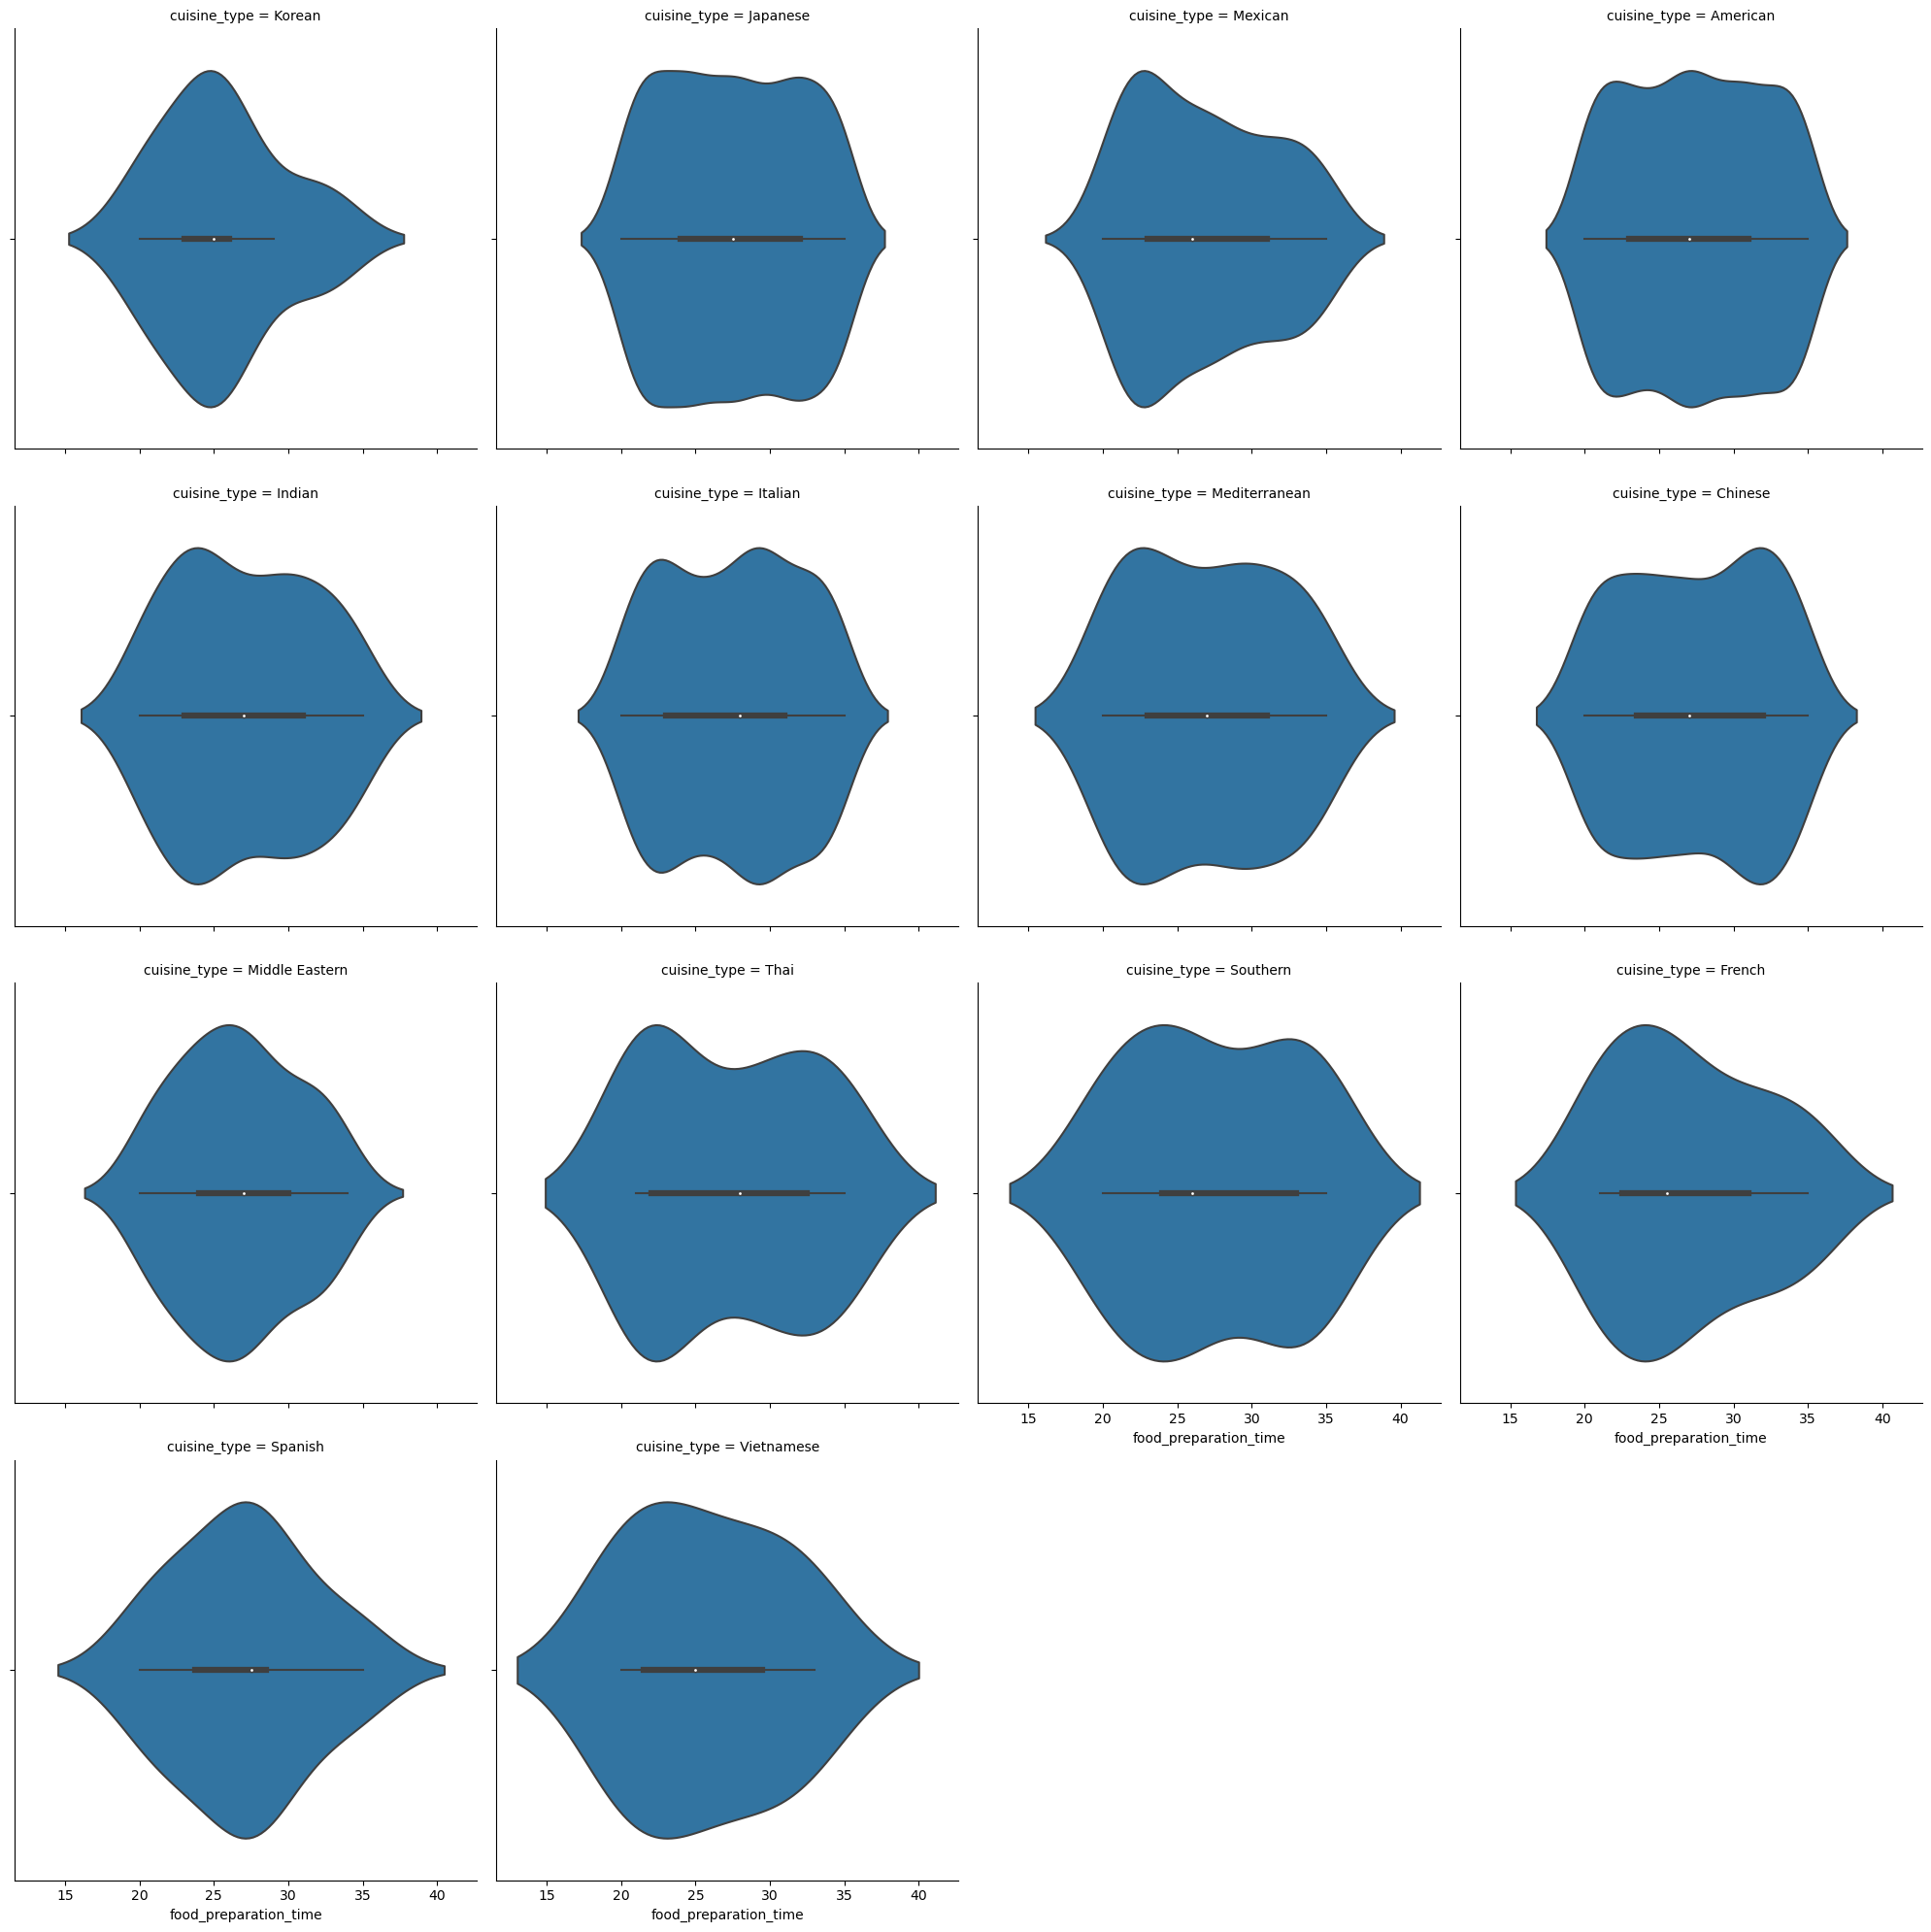

In [159]:
# Correlation between food_preparation_time and cuisine type
sns.catplot(x='food_preparation_time', col='cuisine_type', data = df, col_wrap= 4, kind='violin')
plt.show()

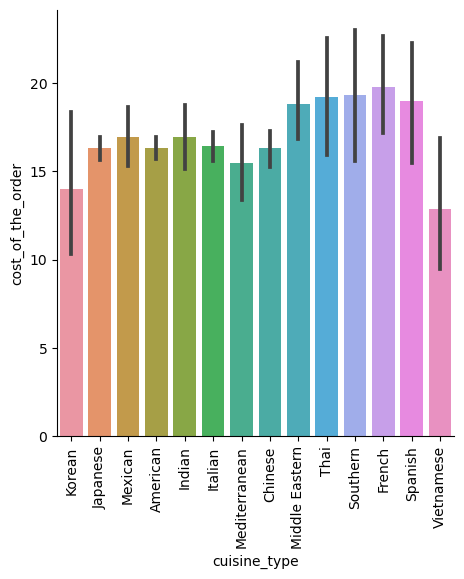

In [150]:
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=df, kind="bar")
plt.xticks(rotation=90)
plt.show()

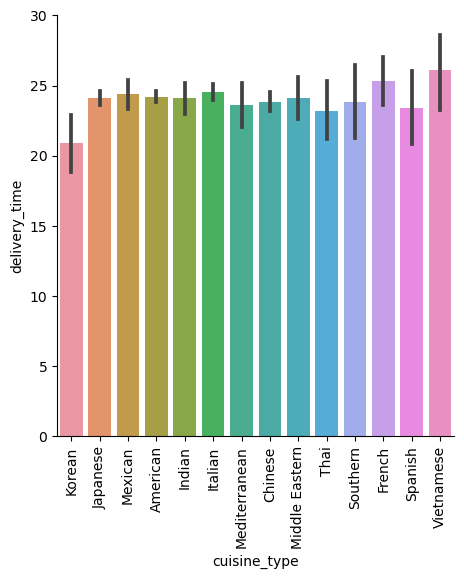

In [152]:
sns.catplot(x='cuisine_type', y='delivery_time', data=df, kind="bar")
plt.xticks(rotation=90)
plt.show()

#### Observations:
Vietnamese food have the heightes delivery time and korean food has the least time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [192]:
# Lets find the list of restaurent who have more than 4 star ratings
df_4rating = df.query('rating > 4')
print(df_4rating['restaurant_name'].count())

588


In [193]:
# Lets take the 4 star hotels then find the one has more 50 ratings
df_rest_50_5star_rating = df_4rating.groupby(by=['restaurant_name'])['rating'].count()
df_rest_50_5star_rating.nlargest(10)

restaurant_name
Shake Shack                      60
The Meatball Shop                53
Blue Ribbon Fried Chicken        32
Blue Ribbon Sushi                32
RedFarm Broadway                 18
Blue Ribbon Sushi Bar & Grill    15
RedFarm Hudson                   15
Parm                             14
Han Dynasty                      13
TAO                              13
Name: rating, dtype: int64

#### Observations:
Seems only two restaurents "Shake Shack" and "The Meatball Shop" have 5 star ratings and got more than 50 ratings

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [195]:
# Write the code here
df['net_revenue'] = df['cost_of_the_order'].apply(lambda x: x*.25 if x>20
                                                      else (x*.15 if x <= 20 and x > 5 else 0))
df['net_revenue'].sum()

6166.303

#### Observations:
The Company revenue is $6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [198]:
df['total_order_time'] = df['delivery_time'] + df['food_preparation_time']
(df.loc[df['total_order_time']>60].shape[0]/df.shape[0])*100

10.537407797681771

#### Observations:
About 10.53% of the orders takes more than 60 mins

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [200]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
From the above data, it is clear the weekdays have a hgher delivery time than the weekends

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- *From the overall analysis, it clear that 'American' is the most popular cuisine*
- *The average cost of the order is around 15 dollars*
- *Weekends normally are the most popular time for ordering*
- *total net revenue generated was 6166.30 dollars*

### Recommendations:

- *Other restaurent should improve the delivery time to increase the ordering*
- *More discount needs to be given over the weekday to increase the order volumn during the week*

---